
### Contexte: sur cette image, il y a des cellules polylobulées et d'autres non. Via un programme j'ai identifié la position X et Y des noyaux (en cyan sur l'image) voir le CSV. Je dois regrouper ceux qui ont une distance euclidienne en dessous de 70 pixels.

### To do: récuperez le CSV attaché, utilisez pandas et rajoutez une colonne "Cell" qui permettra de regrouper les nucleus proches de 70 ou en dessous. Chaque ligne est un nucleus individuel (en cyan)

### Bonus: Créez un scatterplot avec des couleurs différentes pour chaque "Cell" 

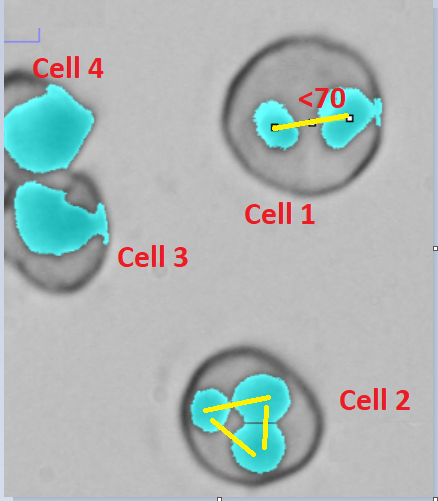




In [70]:
import pandas as pd
import math
import numpy as np

In [71]:
# Pour afficher les tableau en entier
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [72]:
cell_data = pd.read_csv('./Results.csv')

In [73]:
cell_data.shape

(269, 23)

In [74]:
cell_data.head(2)


,,Label,Area,Mean,Min,Max,X,Y,XM,YM,Perim.,Major,Minor,Angle,Feret,IntDen,RawIntDen,FeretX,FeretY,FeretAngle,MinFeret,MinThr,MaxThr
0,17,C2-Composite.tif,3967,255,255,255,689.557,26.190,689.557,26.190,288.593,80.088,63.067,171.595,87.727,1011585,1011585,647,0,133.152,67.0,0,0
1,18,C2-Composite.tif,3892,255,255,255,2526.930,29.601,2526.930,29.601,339.848,79.266,62.517,3.026,99.282,992460,992460,2476,44,26.307,64.0,0,0


In [75]:
cell_data.columns

Index([' ', 'Label', 'Area', 'Mean', 'Min', 'Max', 'X', 'Y', 'XM', 'YM',
       'Perim.', 'Major', 'Minor', 'Angle', 'Feret', 'IntDen', 'RawIntDen',
       'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'MinThr', 'MaxThr'],
      dtype='object')

In [76]:
# fonction pour calculer la distance euclidienne entre les noyeaux
def distance(x1, y1, x2, y2):  # les paramètres: les coordonnées des points x et y
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) # calculer la distance eucliedienne 

# Distance seuil entre les deux noyaux
threshold = 70

# Calculer les distances entre chaque noyau (chaque ligne)de Dataframe
distances = np.zeros((len(cell_data), len(cell_data))) # Créer une matrice de taille équivalente au nombre de comparaisons 
for i in range(len(cell_data)): # indice de la premire ligne de la dataframe
    for j in range(len(cell_data)): # indice de la seconde lignede la dataframe
        distances[i, j] = distance(cell_data['X'][i], cell_data['Y'][i], cell_data['X'][j], cell_data['Y'][j]) #Calculer la distance entre ces deux noyaux


In [77]:
# pour afficher toutes les valeurs de mask ( False & True)
np.set_printoptions(threshold=np.inf)

In [78]:
mask

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [79]:

# Créer un array de m^me longueur que le nombre de noyaux
cell_num = np.zeros(len(cell_data), dtype=int)

# Attribuer une cellule à chaque noyau ( les noyeaux rapprochés auront le même numéro de cellule)
cell_actuelle = 1
for i in range(len(cell_data)):
    # # Si la cellule du noyau a déjà été attribuée, passer au suivant
    # if cell_num[i] != 0:
    #     continue
    # Trouver les noyaux qui sont à une distance euclidienne inférieure ou égale à 70 pixels
    mask_noyeau_proche = np.where(distances[i] <= 70)
        
    
    
        # Attribuer la même cellule à tous les noyaux proches
    cell_num[mask_noyeau_proche] = cell_actuelle
    cell_actuelle += 1
    

# Ajouter la colonne "Cell" au DataFrame
cell_data['Cell'] = cell_num

# # Enregistrer le DataFrame modifié dans un nouveau fichier CSV
# df.to_csv('noyaux_modifie.csv', index=False)

In [80]:
cell_num

array([  1,   2,   3,   4,   9,   6,  14,   8,   9,  20,  18,  12,  23,
        14,  15,  16,  19,  18,  19,  23,  29,  33,  23,  24,  28,  27,
        27,  28,  32,  38,  31,  32,  33,  35,  35,  36,  37,  38,  39,
        44,  42,  42,  48,  44,  45,  50,  47,  48,  49,  50,  56,  52,
        60,  54,  61,  56,  60,  61,  59,  60,  61,  71,  63,  64,  65,
        66,  74,  68,  69,  75,  71,  76,  73,  74,  75,  76,  81,  78,
        79,  80,  81,  82,  83,  84,  89,  91,  91,  88, 102, 103,  91,
       101,  93, 103,  95,  96, 102,  98,  99, 100, 105, 102, 103, 104,
       105, 106, 111, 108, 109, 110, 111, 112, 122, 120, 122, 116, 117,
       126, 119, 126, 121, 122, 123, 124, 125, 126, 127, 128, 129, 134,
       131, 132, 133, 134, 140, 140, 137, 138, 143, 140, 141, 144, 143,
       147, 146, 149, 147, 156, 149, 150, 151, 156, 153, 154, 157, 156,
       157, 158, 165, 160, 161, 165, 167, 164, 165, 166, 167, 168, 174,
       170, 171, 172, 173, 174, 185, 184, 185, 181, 179, 180, 18

In [81]:
cell_data.head()

,,Label,Area,Mean,Min,Max,X,Y,XM,YM,Perim.,Major,Minor,Angle,Feret,IntDen,RawIntDen,FeretX,FeretY,FeretAngle,MinFeret,MinThr,MaxThr,Cell
0,17,C2-Composite.tif,3967,255,255,255,689.557,26.190,689.557,26.190,288.593,80.088,63.067,171.595,87.727,1011585,1011585,647,0,133.152,67.000,0,0,1
1,18,C2-Composite.tif,3892,255,255,255,2526.930,29.601,2526.930,29.601,339.848,79.266,62.517,3.026,99.282,992460,992460,2476,44,26.307,64.000,0,0,2
2,19,C2-Composite.tif,1253,255,255,255,2890.721,12.112,2890.721,12.112,157.539,53.518,29.810,176.471,58.694,319515,319515,2860,0,171.180,30.000,0,0,3
3,20,C2-Composite.tif,1912,255,255,255,3238.619,20.885,3238.619,20.885,205.380,68.931,35.317,1.512,68.884,487560,487560,3204,10,170.811,37.142,0,0,4
4,21,C2-Composite.tif,2058,255,255,255,1776.624,51.585,1776.624,51.585,199.179,60.843,43.067,157.685,67.067,524790,524790,1745,42,159.944,43.821,0,0,9


## Pour voir quels noyaux sont regrouppés dans une même cellule

In [82]:
# Iterer sur l'ensemble des lignes de mask 
for indice, ligne in enumerate(mask):
    # récuperer les numéros de position des valeurs True
    indice_noyau = np.where(ligne)[0]
    # print the position numbers for the current row pour chaque ligne montrer les numéros d'indice correspondnat à chaque noyau proche 
    print(f"Ligne {indice}: {indice_noyau}")

Ligne 0: []
Ligne 1: []
Ligne 2: []
Ligne 3: []
Ligne 4: [8]
Ligne 5: []
Ligne 6: [13]
Ligne 7: []
Ligne 8: [4]
Ligne 9: [12 14 19]
Ligne 10: [11 17]
Ligne 11: [10]
Ligne 12: [ 9 19 22]
Ligne 13: [6]
Ligne 14: [9]
Ligne 15: []
Ligne 16: [18]
Ligne 17: [10]
Ligne 18: [16]
Ligne 19: [ 9 12 22]
Ligne 20: [28]
Ligne 21: [32]
Ligne 22: [12 19]
Ligne 23: []
Ligne 24: [27]
Ligne 25: [26]
Ligne 26: [25]
Ligne 27: [24]
Ligne 28: [20 31]
Ligne 29: [35 37]
Ligne 30: []
Ligne 31: [28]
Ligne 32: [21]
Ligne 33: [34]
Ligne 34: [33]
Ligne 35: [29]
Ligne 36: []
Ligne 37: [29]
Ligne 38: []
Ligne 39: [43]
Ligne 40: [41]
Ligne 41: [40]
Ligne 42: [47]
Ligne 43: [39]
Ligne 44: []
Ligne 45: [49]
Ligne 46: []
Ligne 47: [42]
Ligne 48: []
Ligne 49: [45]
Ligne 50: [55]
Ligne 51: []
Ligne 52: [56 59]
Ligne 53: []
Ligne 54: [60]
Ligne 55: [50]
Ligne 56: [52 59]
Ligne 57: [60]
Ligne 58: []
Ligne 59: [52 56]
Ligne 60: [54 57]
Ligne 61: [64 70]
Ligne 62: []
Ligne 63: []
Ligne 64: [61]
Ligne 65: []
Ligne 66: [73]
Lign

##  Visualiser les cellules à l'aide de scatterplot

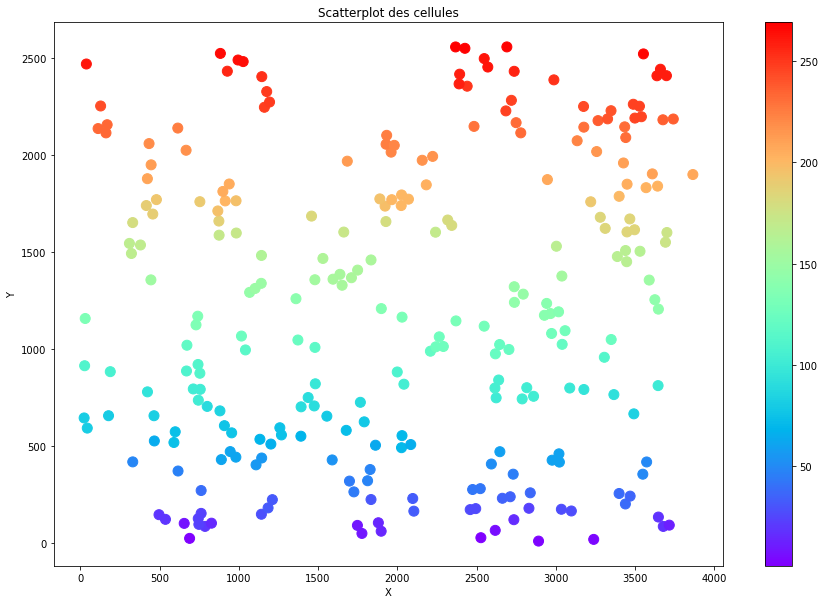

In [67]:
import matplotlib.pyplot as plt



# Créer un scatterplot avec des couleurs différentes pour chaque cellule
fig = plt.figure(figsize=(15,10))
plt.scatter(cell_data['X'], cell_data['Y'], c=cell_data['Cell'], cmap='rainbow', s= 100)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot des cellules')
plt.show()


## Nous pouvons comparer le scatterplot obtenu avec l'image réelle des cellules d'ou provenaient les données

In [59]:
!pip install imageio

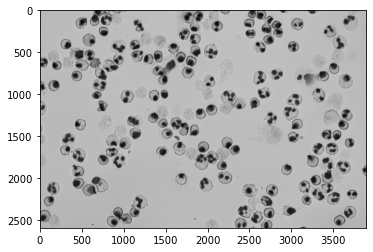

In [62]:
import imageio
image = imageio.imread('Composite.tif')
plt.imshow(image, cmap='gray')
plt.show()

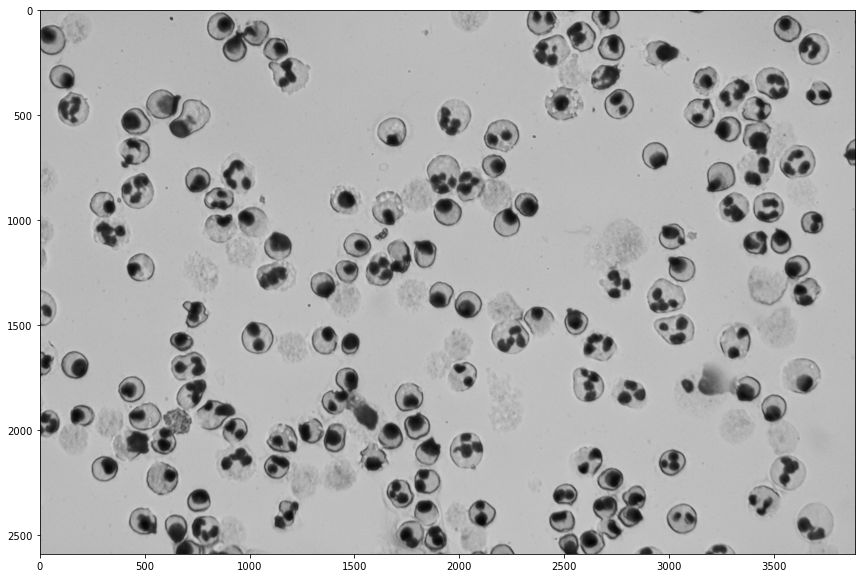

In [85]:
verti_flip_img = np.flipud(image)
fig = plt.figure(figsize = (15, 10))
plt.imshow(verti_flip_img, cmap='gray')
plt.show()